In [1]:
# pip install psycopg2-binary

In [2]:
import pandas.io.sql as psql
import psycopg2 as pg

with pg.connect(database='Retail',

                user='postgres',

                host='localhost',
                
                password = '2336',

                port=5432) as conn:

  sql = 'SELECT * FROM city'

  df = psql.read_sql(sql, conn)

In [3]:
print(df)

  city_code city_name
0         4      Jeju
1         8    Sejong
2         2   Daejeon
3         1     Busan
4         5     Seoul
5         9   Gwangju
6         7     Deagu
7        10   Incheon
8         6     Ulsan
9         3   Gangwon


In [4]:
query = """WITH YEAR_TBL AS (
		SELECT	T.CUSTOMER_ID
			,	EXTRACT('YEAR' FROM T.TRAN_DATE)	AS YYYY
			,	COUNT(DISTINCT T.TRANSACTION_ID)	AS CNT_ORDER
			,	SUM(T.TOTAL_AMT)					AS SUM_AMT
		FROM	TRANSACTIONS AS T
		GROUP BY
				1, 2
				),
	TOT_TBL AS (
		SELECT	YYYY
			,	COUNT(DISTINCT	CUSTOMER_ID)		AS TOT_CUST
			,	SUM(SUM_AMT)						AS TOT_AMT
		FROM	YEAR_TBL
		GROUP BY
				1
				)
		SELECT	YT.YYYY
			,	YT.CUSTOMER_ID
			,	1/CAST(TT.TOT_CUST AS FLOAT)			AS CUST_PROP
			,	SUM(1/CAST(TT.TOT_CUST AS FLOAT)) OVER(PARTITION BY YT.YYYY ORDER BY YT.SUM_AMT DESC)	AS ACC_CUST_PROP
			,	YT.SUM_AMT/CAST(TT.TOT_AMT AS FLOAT)	AS AMT_PROP
			,	SUM(YT.SUM_AMT/CAST(TT.TOT_AMT AS FLOAT)) OVER(PARTITION BY YT.YYYY ORDER BY YT.SUM_AMT DESC)	AS ACC_AMT_PROP
		FROM	YEAR_TBL AS YT
		JOIN
				TOT_TBL AS TT
		ON		YT.YYYY = TT.YYYY"""

In [5]:
df_cust = psql.read_sql(query, conn)
df_cust.head()

,yyyy,customer_id,cust_prop,acc_cust_prop,amt_prop,acc_amt_prop
0,2017.0,272799,0.000263,0.000263,0.001615,0.001615
1,2017.0,271834,0.000263,0.000527,0.001593,0.003208
2,2017.0,269125,0.000263,0.000790,0.001455,0.004663
3,2017.0,274072,0.000263,0.001053,0.001354,0.006017
4,2017.0,275030,0.000263,0.001317,0.001311,0.007328


In [6]:
# Filter
yyyy_2017 = (df_cust.yyyy == 2017)
yyyy_2018 = (df_cust.yyyy == 2018)
yyyy_2019 = (df_cust.yyyy == 2019)
yyyy_2020 = (df_cust.yyyy == 2020)

In [7]:
df_2017 = df_cust.loc[yyyy_2017, ['customer_id','acc_cust_prop','acc_amt_prop']]
df_2018 = df_cust.loc[yyyy_2018, ['customer_id','acc_cust_prop','acc_amt_prop']]
df_2019 = df_cust.loc[yyyy_2019, ['customer_id','acc_cust_prop','acc_amt_prop']]
print(df_2017.head())
print(df_2018.head())
print(df_2019.head())

  customer_id  acc_cust_prop  acc_amt_prop
0      272799       0.000263      0.001615
1      271834       0.000527      0.003208
2      269125       0.000790      0.004663
3      274072       0.001053      0.006017
4      275030       0.001317      0.007328
     customer_id  acc_cust_prop  acc_amt_prop
3797      272080       0.000253      0.001514
3798      273398       0.000507      0.002834
3799      270562       0.000760      0.004077
3800      267419       0.001013      0.005317
3801      267974       0.001266      0.006527
     customer_id  acc_cust_prop  acc_amt_prop
7745      267634       0.000253      0.001857
7746      272354       0.000506      0.003464
7747      271161       0.000759      0.004813
7748      270706       0.001011      0.006138
7749      270350       0.001264      0.007335


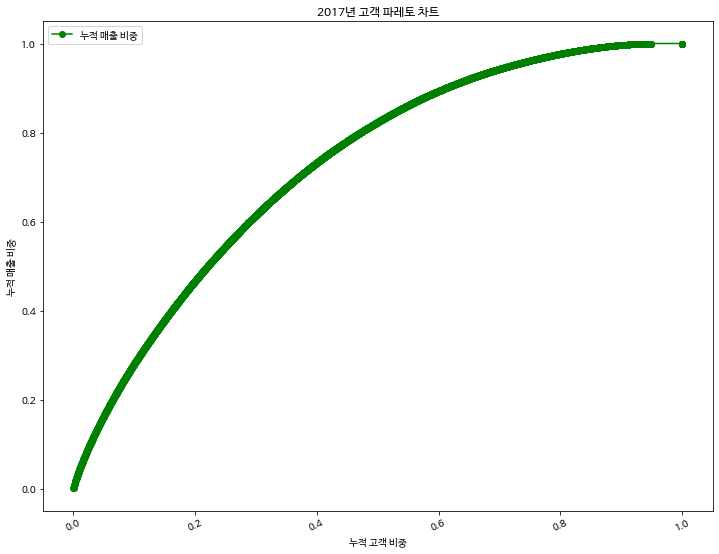

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
# font
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

# 2017 dataframe x, y
df_2017_cust=df_2017['acc_cust_prop']
df_2017_amt=df_2017['acc_amt_prop']

x=df_2017_cust
y=df_2017_amt
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', label = "누적 매출 비중")
plt.xlabel('누적 고객 비중')
plt.ylabel('누적 매출 비중')
plt.xticks(rotation = 25)
plt.title('2017년 고객 파레토 차트')
plt.legend()
plt.show()

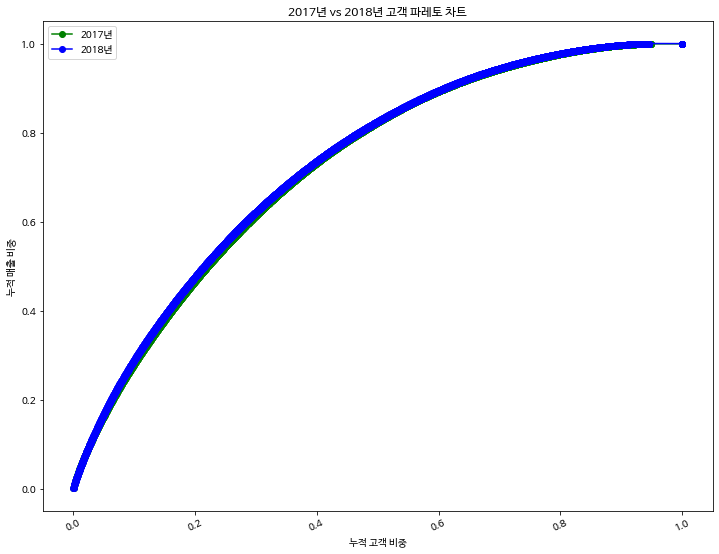

In [9]:
# 2017 vs 2018

# 2017 & 2018 dataframe x, y
df_2017_cust=df_2017['acc_cust_prop']
df_2017_amt=df_2017['acc_amt_prop']
df_2018_cust=df_2018['acc_cust_prop']
df_2018_amt=df_2018['acc_amt_prop']

# x, y setting
x1=df_2017_cust
y1=df_2017_amt
x2=df_2018_cust
y2=df_2018_amt

# make plot
plt.plot(x1, y1, color = 'g', linestyle = 'solid', marker = 'o', label = "2017년")
plt.plot(x2, y2, color = 'b', linestyle = 'solid', marker = 'o', label = "2018년")
plt.xlabel('누적 고객 비중')
plt.ylabel('누적 매출 비중')
plt.xticks(rotation = 25)
plt.title('2017년 vs 2018년 고객 파레토 차트')
plt.legend()
plt.show()

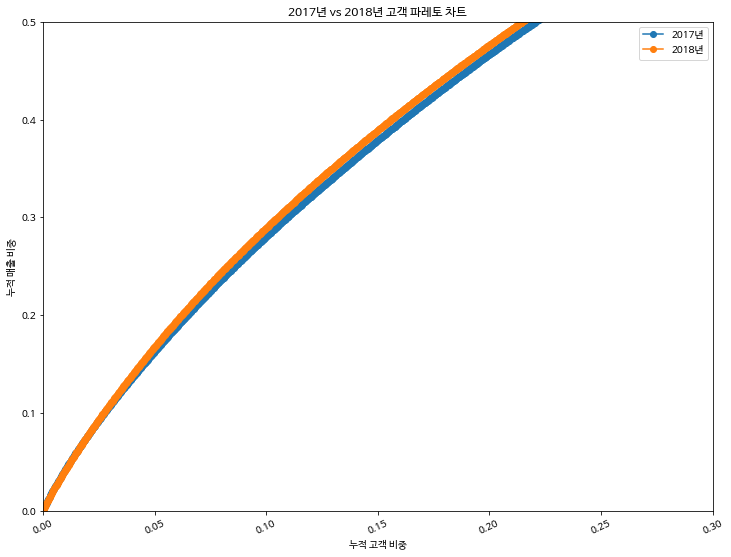

In [10]:
# 2017 vs 2018

# 2017 & 2018 dataframe x, y
df_2017_cust=df_2017['acc_cust_prop']
df_2017_amt=df_2017['acc_amt_prop']
df_2018_cust=df_2018['acc_cust_prop']
df_2018_amt=df_2018['acc_amt_prop']

# x, y setting
x1=df_2017_cust
y1=df_2017_amt
x2=df_2018_cust
y2=df_2018_amt

# make plot
plt.plot(x1, y1, marker = 'o', label = "2017년")
plt.plot(x2, y2, marker = 'o', label = "2018년")
plt.xlabel('누적 고객 비중')
plt.ylabel('누적 매출 비중')
plt.xticks(rotation = 25)
plt.title('2017년 vs 2018년 고객 파레토 차트')
plt.axis([0, 0.3, 0, 0.5])	# x축은 0~0.3 까지, y축은 0~0.5 까지 보여줍니다
plt.legend()
plt.show()